In [257]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import simpson

N = 1000
v = np.full(N, -1)
gammaSquared = 200


In [253]:
def kSquared(energy, potential):
    return gammaSquared * (energy - potential)

def nextPsi(energy, potential, kPrevSquared, kPrevPrevSquared, psiPrev, psiPrevPrev):
    l = 1/(N-1)
    
    f1 = 2*(1 - 5/12 * l**2 * kPrevSquared) * psiPrev
    f2 = (1 + 1/12 * l**2 * kPrevPrevSquared) * psiPrevPrev
    f3 = 1 + 1/12 * l**2 * kSquared(energy, potential)
    
    return (f1 - f2) / f3
    

def integratePsi(energy):
    psi = np.zeros(N)
    psi[1] = 1e-4
    for i in range(2, N):
        psi[i] = nextPsi(energy, v[i],
            kSquared(energy, v[i-1]),
            kSquared(energy, v[i-2]),
            psi[i-1], psi[i-2]
            )
    return psi

def normalize(psi):
    integral = simpson(psi**2, dx=1/(N-1))
    return psi/np.sqrt(integral)

## 3 & 4  -- Shooting method

[-0.9105624999999998, -0.7321249999999996, -0.5530624999999993, -0.3746249999999992, -0.19556249999999903, -0.01712499999999895, 0.16193750000000115, 0.34287500000000126, 0.5275625000000015, 0.7191250000000018]


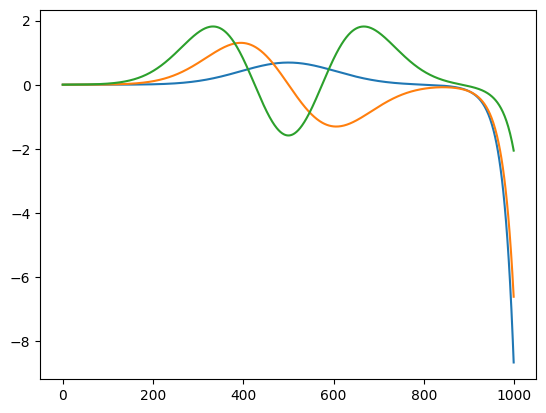

In [264]:
def shoot(energy, tol=5e-4):
    de = 5e-3
    e = energy

    prevLastPsi = 0

    while(abs(de) > tol):
        psi = integratePsi(e)
        psi = normalize(psi)
        
        if psi[-1] * prevLastPsi < 0:
            de = -de/2

        prevLastPsi = psi[-1]
        e += de

    return e

energy = -0.999
eigenEnergies = []
for i in range(10):
    energy = shoot(energy + 0.02)
    eigenEnergies.append(energy)

    if i<3:
        psi = integratePsi(energy)
        psi = normalize(psi)
        plt.plot(psi)

print(eigenEnergies)

## 6 -- Uncertainty relation

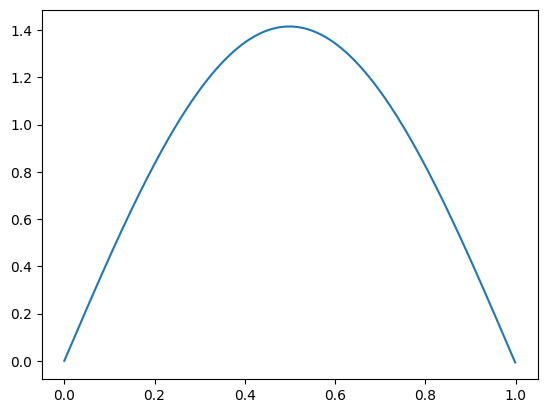

In [218]:
x = np.arange(0,1,1/(N))
psi = integratePsi(-0.9505)
psi = normalize(psi)
plt.plot(x, psi)

[-0.9505624999999999, -0.8027499999999996, -0.5555624999999993, -0.21024999999999897, 0.23381250000000128, 0.7766250000000018, 1.4181874999999928, 2.1584999999999783, 2.9969374999999614, 3.9347499999999425]


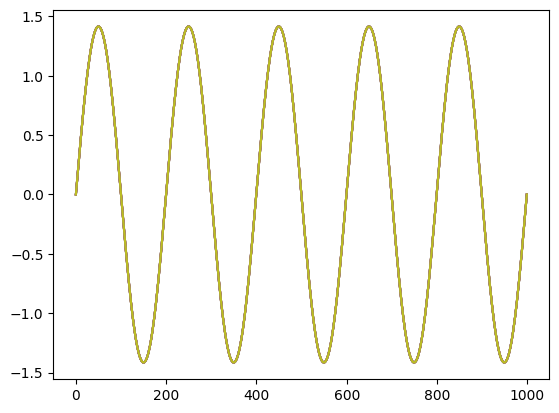

In [260]:

def d2(f):
    res = np.zeros(N)
    for i in range(1, N-1):
        res[i] = (N-1)**2 * (psi[i-1] - 2 * psi[i] + psi[i+1])

    return res

print(eigenEnergies)

for (e, i) in enumerate(eigenEnergies):
    psi = integratePsi(e)
    psi = normalize(psi)
    
    xSecondMoment = simpson(x**2 * psi**2, dx = 1/(N-1))

    pSecondMoment = -simpson(psi * d2(psi), dx = 1/(N-1))

    deltaX = np.sqrt(xSecondMoment - 0.25)
    deltaP = np.sqrt(pSecondMoment)

    plt.plot(e, deltaX*deltaP, 'bo', linewidth=2)

## 7 -- Harmonic Potential

[-0.9106466522216796, -0.7319402160644529, -0.5532334747314449, -0.3745250549316401, -0.1958022918701165, -0.016991943359374238, 0.1622230682373056, 0.34285379028320406, 0.527253890991212, 0.71935662841797, 0.9238577423095717, 1.1447924194335923, 1.3847038421630802, 1.644783416748036, 1.925417800903304, 2.2266344604491963, 2.548337112426729, 2.8904046020507455, 3.2527249298095273, 3.6352044067382305]


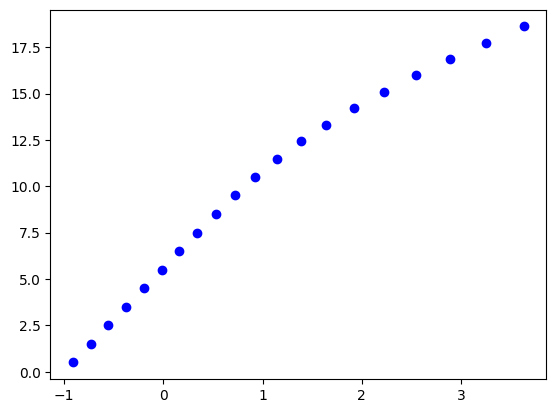

In [283]:
v = np.arange(0,1,1/N)
v = 8*(v-0.5)**2 - 1

gammaSquared = 1000

energy = -0.999
eigenEnergiesHarmonic = []
for i in range(20):
    energy = shoot(energy + 0.02, tol=1e-7)
    eigenEnergiesHarmonic.append(energy)

    psi = integratePsi(energy)
    psi = normalize(psi)
    
    xSecondMoment = simpson(x**2 * psi**2, dx = 1/(N-1))

    pSecondMoment = -simpson(psi * d2(psi), dx = 1/(N-1))

    deltaX = np.sqrt(xSecondMoment - 0.25)
    deltaP = np.sqrt(pSecondMoment)

    plt.plot(energy, deltaX*deltaP, 'bo', linewidth=2)
    # if i<3:
    
    #     psi = integratePsi(energy)
    #     psi = normalize(psi)
    #     plt.plot(psi)


print(eigenEnergiesHarmonic)

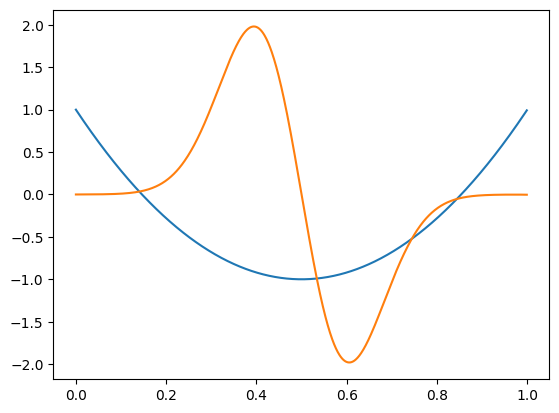

In [270]:
psi = integratePsi(-0.7319402160644529)
psi = normalize(psi)

plt.plot(np.arange(0, 1, 1/N), v)
plt.plot(np.arange(0, 1, 1/N), psi)

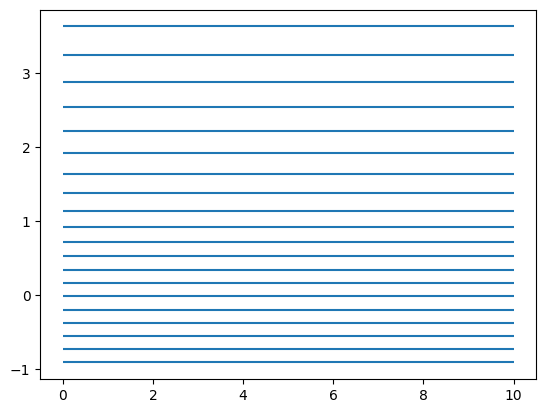

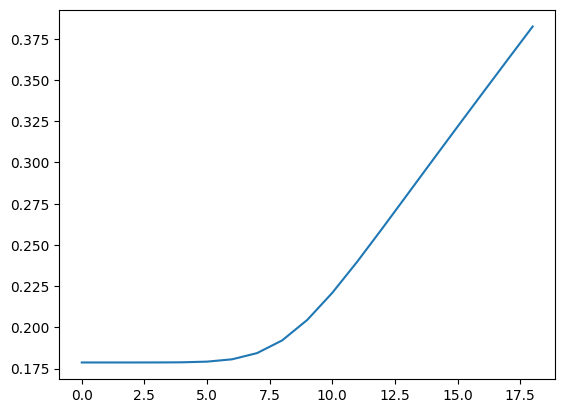

In [294]:
plt.hlines(eigenEnergiesHarmonic, 0, 10)

plt.figure(3)
energyDiff = [eigenEnergiesHarmonic[i+1]-eigenEnergiesHarmonic[i] for i in range(len(eigenEnergiesHarmonic)-1)]
plt.plot(energyDiff)
# plt.xscale('log')
# plt.yscale('log')